In [1]:
import os

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15531606848500364045
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4951913267
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6893631862886924305
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [3]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [4]:
import train, plotting, config

#### 0. Description for Data Output

In [5]:
model_description = 'InceptionV3_frozen_SDNET2018_20190320A'

#### 1-3. Build Model, Image Data Generators and Fit  
(option for just running steps 1-3 below)

#### 1. Build Model

In [31]:
from keras import Model, applications, optimizers
from importlib import reload

In [38]:
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
base_model = applications.inception_v3.InceptionV3(weights='imagenet',
                                                   include_top=False,
                                                   input_shape=input_shape)

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
# for layer in model.layers[:5]:
# https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

#n_layers = len(base_model.layers)
#if config.frozen_layers != 'all':
#    n_layers = config.frozen_layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dense(1, activation='sigmoid'))

model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
base_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1, momentum=1),
              metrics=['accuracy'])

print('Trainable Layer Summary')
print('=======================')
for layer in base_model.layers:
    conf = layer.get_config()
    print(conf['name'], '\t : ', layer.trainable)

NameError: name 'Sequential' is not defined

In [ ]:
#model = train.build_model(verbose=True)
model = train.build_model_inceptionV3(verbose=True)

#### 2. Create Image Data Generators

In [8]:
train_gen, validation_gen, test_gen = train.build_generators()

Found 3400 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


#### 3. Fit Model

In [9]:
history = train.train_model(model=model,
                      train_generator=train_gen,
                      validation_generator=validation_gen,
                      model_description=model_description)

Epoch 1/100
106/106 [==============================] - 27s 259ms/step - loss: 0.7118 - acc: 0.5419 - val_loss: 0.7748 - val_acc: 0.4147

Epoch 00001: acc improved from -inf to 0.54186, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\InceptionV3_frozen_SDNET2018_20190320A\InceptionV3_frozen_SDNET2018_20190320A_weights_improvement_01-0.41.hdf5
Epoch 2/100
106/106 [==============================] - 19s 181ms/step - loss: 0.6442 - acc: 0.6197 - val_loss: 0.7377 - val_acc: 0.4709

Epoch 00002: acc improved from 0.54186 to 0.62144, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\InceptionV3_frozen_SDNET2018_20190320A\InceptionV3_frozen_SDNET2018_20190320A_weights_improvement_02-0.47.hdf5
Epoch 3/100
106/106 [==============================] - 18s 173ms/step - loss: 0.6054 - acc: 0.6816 - val_loss: 0.7061 - val_acc: 0.5171

Epoch 00003: acc improved from 0.62144 to 0.68379, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\Incepti

Epoch 28/100
106/106 [==============================] - 18s 173ms/step - loss: 0.4061 - acc: 0.8234 - val_loss: 0.5202 - val_acc: 0.7363

Epoch 00028: acc did not improve from 0.83017
Epoch 29/100
106/106 [==============================] - 18s 172ms/step - loss: 0.4190 - acc: 0.8181 - val_loss: 0.5301 - val_acc: 0.7295

Epoch 00029: acc did not improve from 0.83017
Epoch 30/100
106/106 [==============================] - 19s 176ms/step - loss: 0.4025 - acc: 0.8349 - val_loss: 0.5588 - val_acc: 0.7046

Epoch 00030: acc improved from 0.83017 to 0.83462, saving model to C:\Users\colin\Google_Drive\ilocal\data\model_outputs\InceptionV3_frozen_SDNET2018_20190320A\InceptionV3_frozen_SDNET2018_20190320A_weights_improvement_30-0.70.hdf5
Epoch 31/100
106/106 [==============================] - 18s 172ms/step - loss: 0.4015 - acc: 0.8272 - val_loss: 0.5340 - val_acc: 0.7260

Epoch 00031: acc did not improve from 0.83462
Epoch 32/100
106/106 [==============================] - 18s 172ms/step - loss:

106/106 [==============================] - 18s 173ms/step - loss: 0.3821 - acc: 0.8390 - val_loss: 0.5912 - val_acc: 0.7003

Epoch 00066: acc did not improve from 0.85184
Epoch 67/100
106/106 [==============================] - 18s 172ms/step - loss: 0.3637 - acc: 0.8455 - val_loss: 0.5512 - val_acc: 0.7183

Epoch 00067: acc did not improve from 0.85184
Epoch 68/100
106/106 [==============================] - 18s 170ms/step - loss: 0.3699 - acc: 0.8370 - val_loss: 0.5209 - val_acc: 0.7372

Epoch 00068: acc did not improve from 0.85184
Epoch 69/100
106/106 [==============================] - 18s 171ms/step - loss: 0.3664 - acc: 0.8408 - val_loss: 0.5485 - val_acc: 0.7226

Epoch 00069: acc did not improve from 0.85184
Epoch 70/100
106/106 [==============================] - 18s 172ms/step - loss: 0.3587 - acc: 0.8443 - val_loss: 0.5042 - val_acc: 0.7432

Epoch 00070: acc did not improve from 0.85184
Epoch 71/100
106/106 [==============================] - 18s 172ms/step - loss: 0.3571 - acc: 

In [10]:
training_output_dir = (config.model_dir + os.path.sep + 
                       model_description + os.path.sep)
training_output_dir

'C:\\Users\\colin\\Google_Drive\\ilocal\\data\\model_outputs\\InceptionV3_frozen_SDNET2018_20190320A\\'

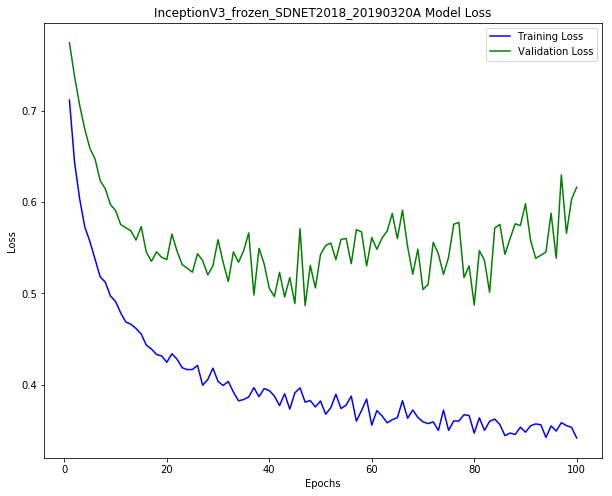

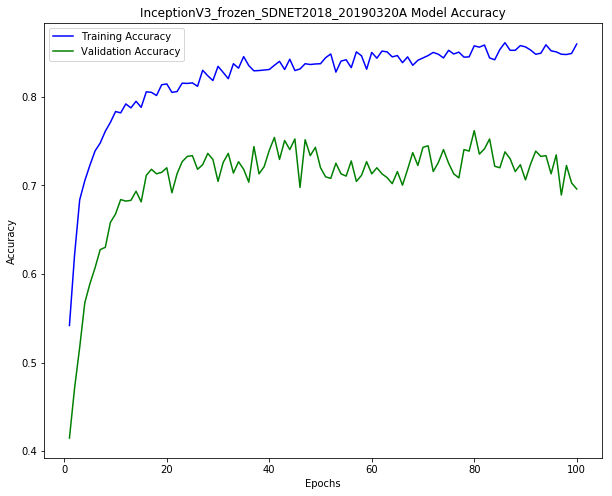

In [19]:
plotting.plot_history(history, description=model_description)